### The following notebook accomplishes the following things:
1. Extracts the results from the observations file 
2. Creates the input file for initial conditions based on the spinup observations

- The following files are based on the scenario I as described in - D:\Seafile_folders\Seafile\My Library\Hannover_PhD\Work\ATS\RKModel\RKModel_info_simulation_strategy.xlsx\Spin_up_strategy

In [1]:
%matplotlib inline
import sys,os
import ats_xdmf
import plot_column_data
import colors
import numpy as np
import matplotlib.cm
from matplotlib import pyplot as plt
import h5py
import pandas as pd
import matplotlib.gridspec as gridspec

### Observation data

In [44]:
df_obs_AWS = pd.read_csv('/home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_OutputData_4yrs/Calib_outputdata_2016_2018.csv',sep='\t')
df_obs_AWS.head()

,TIMESTAMP,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),Soil temperature at - 0.2 m (°C),Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C)
0,2016-01-01,7.897694,7.523868,8.694236,9.016111,5.368792,4.093549,6.058042,-13.103958,-12.507847,-11.848819,-11.295486,-9.824722,-7.814958,-4.874889,-3.447965
1,2016-01-02,7.991826,7.594250,8.745417,9.012639,5.350889,4.060958,6.008417,-12.255417,-11.861597,-11.342569,-10.947708,-9.781389,-7.936854,-5.063889,-3.639549
2,2016-01-03,7.992500,7.606875,8.766806,9.033472,5.342833,4.033590,5.962187,-12.737500,-11.824514,-11.200694,-10.765278,-9.618403,-7.946111,-5.228028,-3.817500
3,2016-01-04,7.960069,7.581465,8.749236,9.025833,5.336757,4.012583,5.923819,-13.006597,-11.997847,-11.365486,-10.867778,-9.648889,-7.977951,-5.358771,-3.977958
4,2016-01-05,7.913792,7.539000,8.703056,8.995694,5.324597,3.993715,5.892174,-13.525278,-12.371597,-11.691181,-11.171181,-9.829653,-8.078194,-5.476889,-4.119438


####  Converting Soil moisture content to saturation of liquid

In [46]:
depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

depth_peat = 0.3
poro_peat = 0.501199
poro_mineral = 0.407367

for i, depth in enumerate(depths):
    if depth < depth_peat:
        df_obs_AWS[f'point -{depth} saturation liquid'] = df_obs_AWS[f'Soil moisture at - {depth} m (%)']/(poro_peat*100)
    else:
        df_obs_AWS[f'point -{depth} saturation liquid'] = df_obs_AWS[f'Soil moisture at - {depth} m (%)']/(poro_mineral*100)

### Static spinup

#### 1. Extracts the results from the observations file 

In [48]:
# Reading the csv file 
df_observation = pd.read_csv('Static_spinup_scenario_I_HD2.demo/observations.dat', skiprows=178, sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -5.0 temperature [K],point -10.0 temperature [K],...,point -0.04 saturation ice,point -0.1 saturation ice,point -0.2 saturation ice,point -0.4 saturation ice,point -0.8 saturation ice,point -1.2 saturation ice,point -1.6 saturation ice,point -5.0 saturation ice,point -10.0 saturation ice,time [days]
time [days],,,,,,,,,,,,,,,,,,,,,
0.0,0.0,270.15,270.15,270.15,270.15,270.15,270.15,270.15,270.15,270.15,...,0.428966,0.435553,0.44252,0.131444,0.170294,0.251709,0.426936,0.826479,0.826479,0.0
1.0,86400.0,270.15,270.15,270.15,270.15,270.15,270.15,270.15,270.15,270.15,...,0.428966,0.435553,0.44252,0.131444,0.170294,0.251709,0.426936,0.826479,0.826479,1.0
2.0,172800.0,270.15,270.15,270.15,270.15,270.15,270.15,270.15,270.15,270.15,...,0.428966,0.435553,0.44252,0.131444,0.170294,0.251709,0.426936,0.826479,0.826479,2.0
3.0,259200.0,270.15,270.15,270.15,270.15,270.15,270.15,270.15,270.15,270.15,...,0.428966,0.435553,0.44252,0.131444,0.170294,0.251709,0.426936,0.826479,0.826479,3.0
4.0,345600.0,270.15,270.15,270.15,270.15,270.15,270.15,270.15,270.15,270.15,...,0.428966,0.435553,0.44252,0.131444,0.170294,0.251709,0.426936,0.826479,0.826479,4.0


In [49]:
len(df_observation)

36526

In [50]:
df_observation.columns

Index(['time [s]', 'point -0.04 temperature [K]', 'point -0.1 temperature [K]',
       'point -0.2 temperature [K]', 'point -0.4 temperature [K]',
       'point -0.8 temperature [K]', 'point -1.2 temperature [K]',
       'point -1.6 temperature [K]', 'point -5.0 temperature [K]',
       'point -10.0 temperature [K]', 'point -20.0 temperature [K]',
       'point -30.0 temperature [K]', 'point -40.0 temperature [K]',
       'point -0.04 saturation liquid', 'point -0.1 saturation liquid',
       'point -0.2 saturation liquid', 'point -0.4 saturation liquid',
       'point -0.8 saturation liquid', 'point -1.2 saturation liquid',
       'point -1.6 saturation liquid', 'point -0.01 saturation ice',
       'point -0.04 saturation ice', 'point -0.1 saturation ice',
       'point -0.2 saturation ice', 'point -0.4 saturation ice',
       'point -0.8 saturation ice', 'point -1.2 saturation ice',
       'point -1.6 saturation ice', 'point -5.0 saturation ice',
       'point -10.0 saturation ice', 

In [86]:
### Extracting the final results from spinup (Check)

### Reading the file once more to check
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'/home/rk/ats_rk/testing/ats-demos/rk_model/Spinup_final_10032022/Static_spinup_scenario_I_HD2.demo/checkpoint_final.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    air_temp = np.array(hdf.get('temperature.cell.0'))
    print(len(np.array(hdf.get('temperature.cell.0'))))
    #print(air_temp)

    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))

List of datasets in this file: 
 
 ['advected_energy_flux.face.0', 'darcy_velocity.cell.0', 'darcy_velocity.cell.1', 'darcy_velocity.cell.2', 'diffusive_energy_flux.face.0', 'dupwind_enthalpy_times_relative_permeability|dpressure.face.0', 'dupwind_enthalpy_times_relative_permeability|dtemperature.face.0', 'dupwind_relative_permeability|dpressure.face.0', 'dupwind_relative_permeability|dtemperature.face.0', 'dupwind_thermal_conductivity|dpressure.face.0', 'dwater_content|dtemperature.cell.0', 'mass_flux.face.0', 'mass_flux_direction.face.0', 'pressure.cell.0', 'pressure.face.0', 'temperature.cell.0', 'temperature.face.0', 'upwind_enthalpy_times_relative_permeability.face.0', 'upwind_relative_permeability.face.0', 'upwind_thermal_conductivity.face.0']


400


#### Plotting the values 
##### 1. Subsurface temperature

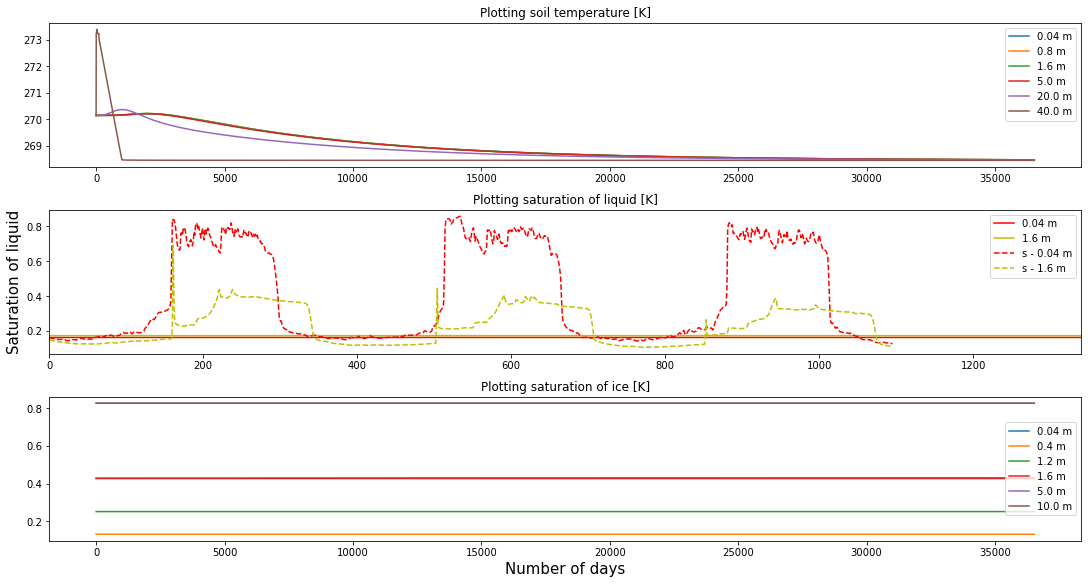

In [61]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
#f2_ax1.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
f2_ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],'r',label='0.04 m')
#f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(df_observation['point -0.4 saturation liquid'],'g',label='0.4 m')
#f2_ax2.plot(df_observation['point -0.8 saturation liquid'],'b',label='0.8 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],'y',label='1.6 m')
f2_ax2.plot(df_obs_AWS['point -0.04 saturation liquid'],'r--',label='s - 0.04 m')
#f2_ax2.plot(df_obs_AWS['point -0.4 saturation liquid'],'g--',label='s - 0.4 m')
#f2_ax2.plot(df_obs_AWS['point -0.8 saturation liquid'],'b--',label='s - 0.8 m')
f2_ax2.plot(df_obs_AWS['point -1.6 saturation liquid'],'y--',label='s - 1.6 m')
f2_ax2.legend()
f2_ax2.set_ylabel('Saturation of liquid',fontsize=15)
f2_ax2.set_xlim(0,1340)

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
f2_ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
#f2_ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
f2_ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')
f2_ax3.set_xlabel('Number of days',fontsize=15)
f2_ax3.legend()


### Dynamic Spinup

#### 1. Extracts the results from the observations file 

In [75]:
# Reading the csv file 
df_observation = pd.read_csv('Dyn_spinup_scenario_II.demo/observations.dat', skiprows=178, sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -5.0 temperature [K],point -10.0 temperature [K],...,point -0.04 saturation ice,point -0.1 saturation ice,point -0.2 saturation ice,point -0.4 saturation ice,point -0.8 saturation ice,point -1.2 saturation ice,point -1.6 saturation ice,point -5.0 saturation ice,point -10.0 saturation ice,time [days]
time [days],,,,,,,,,,,,,,,,,,,,,
0.0,0.0,268.470785,268.470784,268.470782,268.470780,268.470772,268.470756,268.470737,268.470404,268.469194,...,0.43035,0.436936,0.443901,0.131464,0.170304,0.251697,0.426878,0.826493,0.826493,0.0
1.0,86400.0,268.470782,268.470781,268.470780,268.470778,268.470769,268.470753,268.470734,268.470401,268.469192,...,0.43035,0.436936,0.443901,0.131464,0.170304,0.251697,0.426878,0.826493,0.826493,1.0
2.0,172800.0,268.470779,268.470778,268.470777,268.470775,268.470766,268.470751,268.470731,268.470398,268.469189,...,0.43035,0.436936,0.443901,0.131464,0.170304,0.251697,0.426878,0.826493,0.826493,2.0
3.0,259200.0,268.470776,268.470776,268.470774,268.470772,268.470764,268.470748,268.470728,268.470396,268.469187,...,0.43035,0.436936,0.443901,0.131464,0.170304,0.251697,0.426878,0.826493,0.826493,3.0
4.0,345600.0,268.470774,268.470773,268.470771,268.470769,268.470761,268.470745,268.470726,268.470393,268.469184,...,0.43035,0.436936,0.443901,0.131464,0.170304,0.251697,0.426878,0.826493,0.826493,4.0


In [76]:
len(df_observation)

3651

In [77]:
df_observation.columns

Index(['time [s]', 'point -0.04 temperature [K]', 'point -0.1 temperature [K]',
       'point -0.2 temperature [K]', 'point -0.4 temperature [K]',
       'point -0.8 temperature [K]', 'point -1.2 temperature [K]',
       'point -1.6 temperature [K]', 'point -5.0 temperature [K]',
       'point -10.0 temperature [K]', 'point -20.0 temperature [K]',
       'point -30.0 temperature [K]', 'point -40.0 temperature [K]',
       'point -0.04 saturation liquid', 'point -0.1 saturation liquid',
       'point -0.2 saturation liquid', 'point -0.4 saturation liquid',
       'point -0.8 saturation liquid', 'point -1.2 saturation liquid',
       'point -1.6 saturation liquid', 'point -0.01 saturation ice',
       'point -0.04 saturation ice', 'point -0.1 saturation ice',
       'point -0.2 saturation ice', 'point -0.4 saturation ice',
       'point -0.8 saturation ice', 'point -1.2 saturation ice',
       'point -1.6 saturation ice', 'point -5.0 saturation ice',
       'point -10.0 saturation ice', 

#### Plotting the values 
##### 1. Subsurface temperature

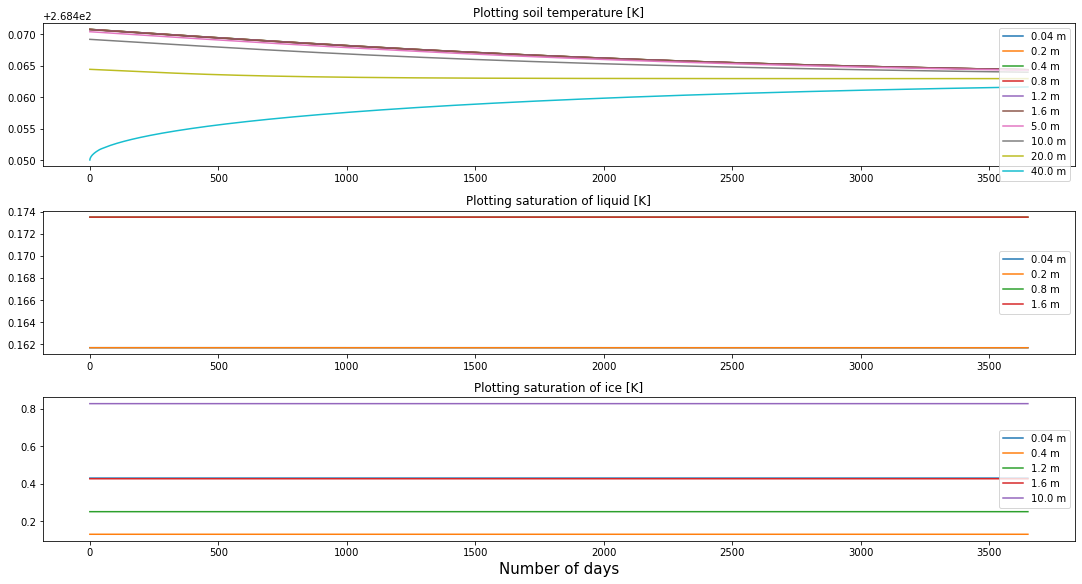

In [81]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
f2_ax1.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
f2_ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
f2_ax2.legend()
#f2_ax2.set_ylabel('Temperature [K]',fontsize=15)

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
f2_ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
#f2_ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
f2_ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
#f2_ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')
f2_ax3.set_xlabel('Number of days',fontsize=15)
f2_ax3.legend()


In [15]:
# Reading the csv file 
df_observation = pd.read_csv('Dyn_spinup_scenario_II_onlytop.demo/observations.dat', skiprows=178, sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -5.0 temperature [K],point -10.0 temperature [K],...,point -0.04 saturation ice,point -0.1 saturation ice,point -0.2 saturation ice,point -0.4 saturation ice,point -0.8 saturation ice,point -1.2 saturation ice,point -1.6 saturation ice,point -5.0 saturation ice,point -10.0 saturation ice,time [days]
time [days],,,,,,,,,,,,,,,,,,,,,
0.0,0.0,264.166771,264.166770,264.166769,264.166768,264.166761,264.166751,264.166737,264.166446,264.165443,...,0.527145,0.540732,0.555901,0.299524,0.571906,0.826463,0.826504,0.826504,0.826504,0.0
1.0,86400.0,264.166769,264.166768,264.166767,264.166766,264.166759,264.166749,264.166735,264.166443,264.165441,...,0.527145,0.540732,0.555901,0.299524,0.571906,0.826463,0.826504,0.826504,0.826504,1.0
2.0,172800.0,264.166766,264.166766,264.166765,264.166763,264.166757,264.166746,264.166732,264.166441,264.165439,...,0.527145,0.540732,0.555901,0.299524,0.571906,0.826463,0.826504,0.826504,0.826504,2.0
3.0,259200.0,264.166764,264.166764,264.166763,264.166761,264.166755,264.166744,264.166730,264.166439,264.165437,...,0.527145,0.540732,0.555901,0.299524,0.571906,0.826463,0.826504,0.826504,0.826504,3.0
4.0,345600.0,264.166762,264.166761,264.166761,264.166759,264.166753,264.166742,264.166728,264.166437,264.165435,...,0.527145,0.540732,0.555901,0.299524,0.571906,0.826463,0.826504,0.826504,0.826504,4.0


In [16]:
len(df_observation)

3651

In [17]:
df_observation.columns

Index(['time [s]', 'point -0.04 temperature [K]', 'point -0.1 temperature [K]',
       'point -0.2 temperature [K]', 'point -0.4 temperature [K]',
       'point -0.8 temperature [K]', 'point -1.2 temperature [K]',
       'point -1.6 temperature [K]', 'point -5.0 temperature [K]',
       'point -10.0 temperature [K]', 'point -20.0 temperature [K]',
       'point -30.0 temperature [K]', 'point -40.0 temperature [K]',
       'point -0.04 saturation liquid', 'point -0.1 saturation liquid',
       'point -0.2 saturation liquid', 'point -0.4 saturation liquid',
       'point -0.8 saturation liquid', 'point -1.2 saturation liquid',
       'point -1.6 saturation liquid', 'point -0.01 saturation ice',
       'point -0.04 saturation ice', 'point -0.1 saturation ice',
       'point -0.2 saturation ice', 'point -0.4 saturation ice',
       'point -0.8 saturation ice', 'point -1.2 saturation ice',
       'point -1.6 saturation ice', 'point -5.0 saturation ice',
       'point -10.0 saturation ice', 

#### Plotting the values 
##### 1. Subsurface temperature

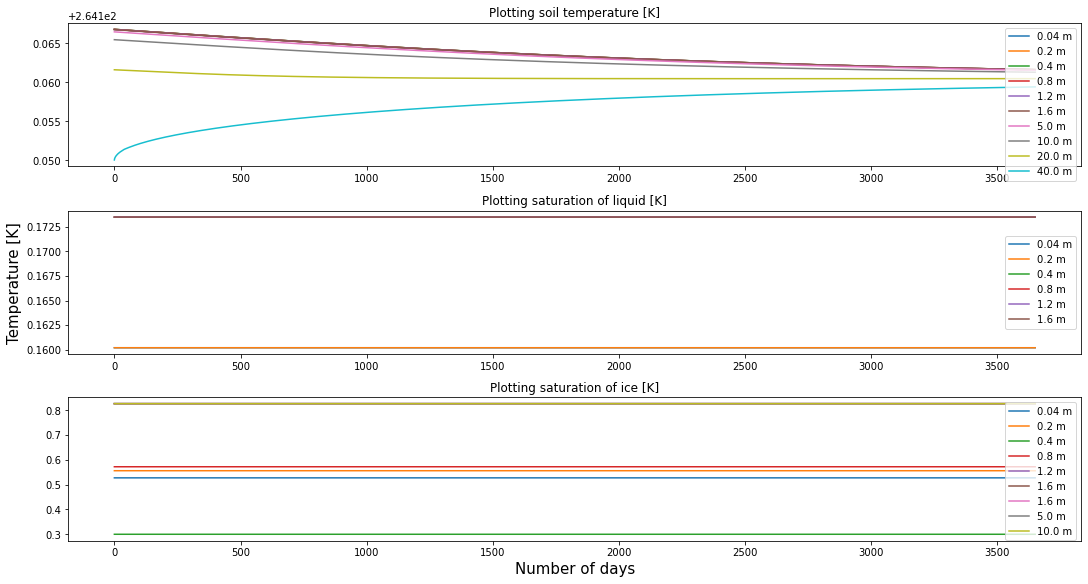

In [18]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
f2_ax1.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
f2_ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
f2_ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
f2_ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
f2_ax2.legend()
f2_ax2.set_ylabel('Temperature [K]',fontsize=15)

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
f2_ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
f2_ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
f2_ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
f2_ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')
f2_ax3.set_xlabel('Number of days',fontsize=15)
f2_ax3.legend()


In [25]:
# Reading the csv file 
df_observation = pd.read_csv('Dyn_spinup_scenario_II.demo/observations.dat', skiprows=178, sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -5.0 temperature [K],point -10.0 temperature [K],...,point -0.04 saturation ice,point -0.1 saturation ice,point -0.2 saturation ice,point -0.4 saturation ice,point -0.8 saturation ice,point -1.2 saturation ice,point -1.6 saturation ice,point -5.0 saturation ice,point -10.0 saturation ice,time [days]
time [days],,,,,,,,,,,,,,,,,,,,,
0.0,0.0,264.166771,264.166770,264.166769,264.166768,264.166761,264.166751,264.166737,264.166446,264.165443,...,0.527145,0.540732,0.555901,0.299524,0.571906,0.826463,0.826504,0.826504,0.826504,0.0
1.0,86400.0,264.166769,264.166768,264.166767,264.166766,264.166759,264.166749,264.166735,264.166443,264.165441,...,0.527145,0.540732,0.555901,0.299524,0.571906,0.826463,0.826504,0.826504,0.826504,1.0
2.0,172800.0,264.166766,264.166766,264.166765,264.166763,264.166757,264.166746,264.166732,264.166441,264.165439,...,0.527145,0.540732,0.555901,0.299524,0.571906,0.826463,0.826504,0.826504,0.826504,2.0
3.0,259200.0,264.166764,264.166764,264.166763,264.166761,264.166755,264.166744,264.166730,264.166439,264.165437,...,0.527145,0.540732,0.555901,0.299524,0.571906,0.826463,0.826504,0.826504,0.826504,3.0
4.0,345600.0,264.166762,264.166761,264.166761,264.166759,264.166753,264.166742,264.166728,264.166437,264.165435,...,0.527145,0.540732,0.555901,0.299524,0.571906,0.826463,0.826504,0.826504,0.826504,4.0


In [26]:
len(df_observation)

3651

In [27]:
df_observation.columns

Index(['time [s]', 'point -0.04 temperature [K]', 'point -0.1 temperature [K]',
       'point -0.2 temperature [K]', 'point -0.4 temperature [K]',
       'point -0.8 temperature [K]', 'point -1.2 temperature [K]',
       'point -1.6 temperature [K]', 'point -5.0 temperature [K]',
       'point -10.0 temperature [K]', 'point -20.0 temperature [K]',
       'point -30.0 temperature [K]', 'point -40.0 temperature [K]',
       'point -0.04 saturation liquid', 'point -0.1 saturation liquid',
       'point -0.2 saturation liquid', 'point -0.4 saturation liquid',
       'point -0.8 saturation liquid', 'point -1.2 saturation liquid',
       'point -1.6 saturation liquid', 'point -0.01 saturation ice',
       'point -0.04 saturation ice', 'point -0.1 saturation ice',
       'point -0.2 saturation ice', 'point -0.4 saturation ice',
       'point -0.8 saturation ice', 'point -1.2 saturation ice',
       'point -1.6 saturation ice', 'point -5.0 saturation ice',
       'point -10.0 saturation ice', 

#### Plotting the values 
##### 1. Subsurface temperature

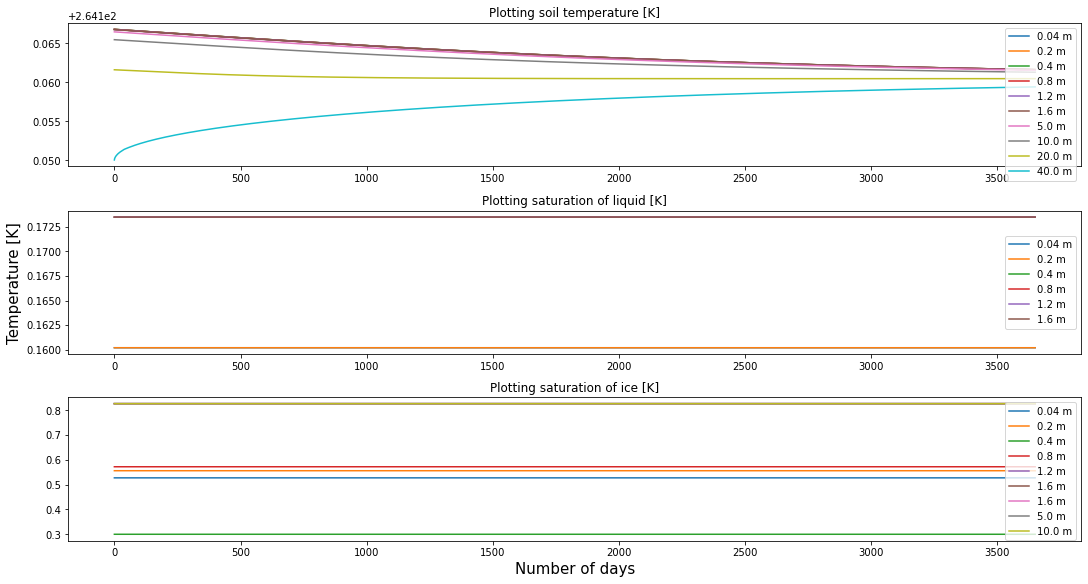

In [28]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
f2_ax1.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
f2_ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
f2_ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
f2_ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
f2_ax2.legend()
f2_ax2.set_ylabel('Temperature [K]',fontsize=15)

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
f2_ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
f2_ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
f2_ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
f2_ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')
f2_ax3.set_xlabel('Number of days',fontsize=15)
f2_ax3.legend()


In [129]:
# Reading the csv file 
df_observation = pd.read_csv('Case1_B_glm_cyclicavg.demo/observations.dat', skiprows=88, sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,point -0.2 saturation liquid,point -0.4 saturation liquid,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid,time [days]
time [days],,,,,,,,,,,,,,,,
0.0,0.0,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,0.224330,0.224330,0.224330,0.159523,0.159523,0.159523,0.159523,0.0
1.0,86400.0,261.492945,265.480375,268.272682,269.283340,270.008051,270.132003,270.147080,0.224325,0.224326,0.224327,0.159515,0.159522,0.159523,0.159523,1.0
2.0,172800.0,260.444397,264.042042,267.102528,268.391676,269.663783,270.037326,270.119389,0.224325,0.224326,0.224327,0.159510,0.159518,0.159522,0.159523,2.0
3.0,259200.0,260.058866,263.339324,266.351863,267.710729,269.288796,269.890746,270.063827,0.224325,0.224326,0.224326,0.159507,0.159515,0.159521,0.159522,3.0
4.0,345600.0,260.588146,263.299179,265.986151,267.266928,268.946238,269.715573,269.983183,0.224325,0.224326,0.224326,0.159506,0.159513,0.159519,0.159522,4.0


In [130]:
len(df_observation)

3651

In [131]:
df_observation.columns

Index(['time [s]', 'point -0.04 temperature [K]', 'point -0.1 temperature [K]',
       'point -0.2 temperature [K]', 'point -0.4 temperature [K]',
       'point -0.8 temperature [K]', 'point -1.2 temperature [K]',
       'point -1.6 temperature [K]', 'point -0.04 saturation liquid',
       'point -0.1 saturation liquid', 'point -0.2 saturation liquid',
       'point -0.4 saturation liquid', 'point -0.8 saturation liquid',
       'point -1.2 saturation liquid', 'point -1.6 saturation liquid',
       'time [days]'],
      dtype='object')

#### Plotting the values 
##### 1. Subsurface temperature

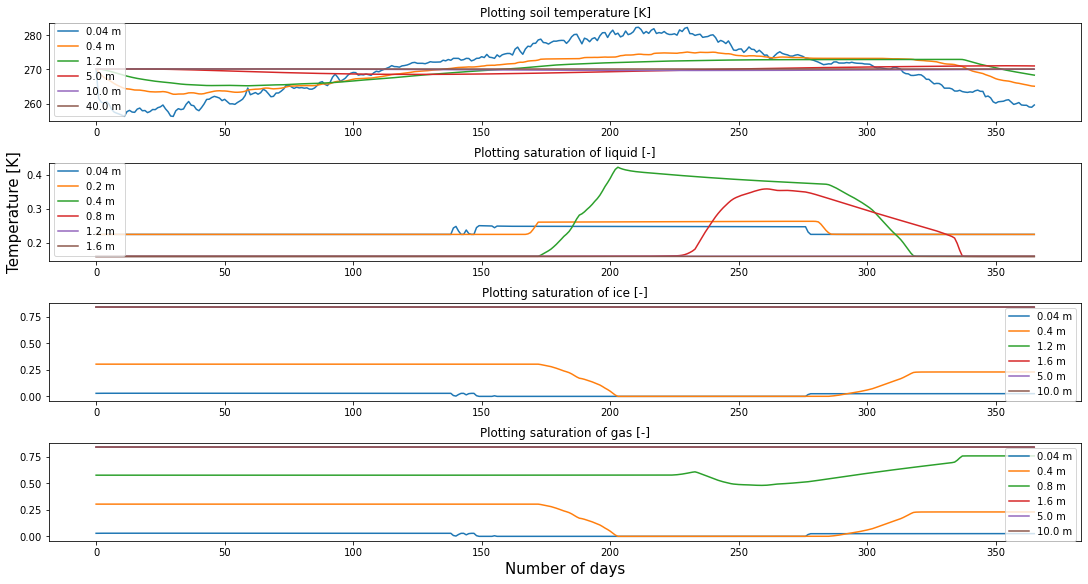

In [144]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.set_ylabel('Temperature [K]',fontsize=15)
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
f2_ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
f2_ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
f2_ax2.legend()
f2_ax2.set_ylabel('Saturation of liquid',fontsize=15)


In [136]:
# Reading the csv file 
df_observation = pd.read_csv('Case1_B_glm_cyclicavg_trial.demo/observations.dat', skiprows=250, sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -5.0 temperature [K],point -10.0 temperature [K],...,point -0.04 saturation gas,point -0.1 saturation gas,point -0.2 saturation gas,point -0.4 saturation gas,point -0.8 saturation gas,point -1.2 saturation gas,point -1.6 saturation gas,point -5.0 saturation gas,point -10.0 saturation gas,time [days]
time [days],,,,,,,,,,,,,,,,,,,,,
0.0,0.0,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,270.15,...,0.028712,0.032156,0.036510,0.303642,0.576523,0.840477,0.840477,0.840477,0.840477,0.0
1.0,86400.0,261.492945,265.480375,268.272682,269.283340,270.008051,270.132003,270.147080,270.150000,270.15,...,0.029156,0.032328,0.036562,0.303627,0.576515,0.840477,0.840477,0.840477,0.840477,1.0
2.0,172800.0,260.444397,264.042042,267.102528,268.391676,269.663783,270.037326,270.119389,270.150000,270.15,...,0.029249,0.032411,0.036605,0.303612,0.576495,0.840478,0.840477,0.840477,0.840477,2.0
3.0,259200.0,260.058866,263.339324,266.351863,267.710729,269.288796,269.890746,270.063827,270.149997,270.15,...,0.029285,0.032457,0.036637,0.303602,0.576472,0.840479,0.840478,0.840477,0.840477,3.0
4.0,345600.0,260.588146,263.299179,265.986151,267.266928,268.946238,269.715573,269.983183,270.149988,270.15,...,0.029236,0.032460,0.036654,0.303596,0.576451,0.840474,0.840478,0.840477,0.840477,4.0


In [137]:
len(df_observation)

366

In [138]:
df_observation.columns

Index(['time [s]', 'point -0.04 temperature [K]', 'point -0.1 temperature [K]',
       'point -0.2 temperature [K]', 'point -0.4 temperature [K]',
       'point -0.8 temperature [K]', 'point -1.2 temperature [K]',
       'point -1.6 temperature [K]', 'point -5.0 temperature [K]',
       'point -10.0 temperature [K]', 'point -20.0 temperature [K]',
       'point -30.0 temperature [K]', 'point -40.0 temperature [K]',
       'point -0.04 saturation liquid', 'point -0.1 saturation liquid',
       'point -0.2 saturation liquid', 'point -0.4 saturation liquid',
       'point -0.8 saturation liquid', 'point -1.2 saturation liquid',
       'point -1.6 saturation liquid', 'point -5.0 saturation liquid',
       'point -10.0 saturation liquid', 'point -0.01 saturation ice',
       'point -0.04 saturation ice', 'point -0.1 saturation ice',
       'point -0.2 saturation ice', 'point -0.4 saturation ice',
       'point -0.8 saturation ice', 'point -1.2 saturation ice',
       'point -1.6 saturation 

#### Plotting the values 
##### 1. Subsurface temperature

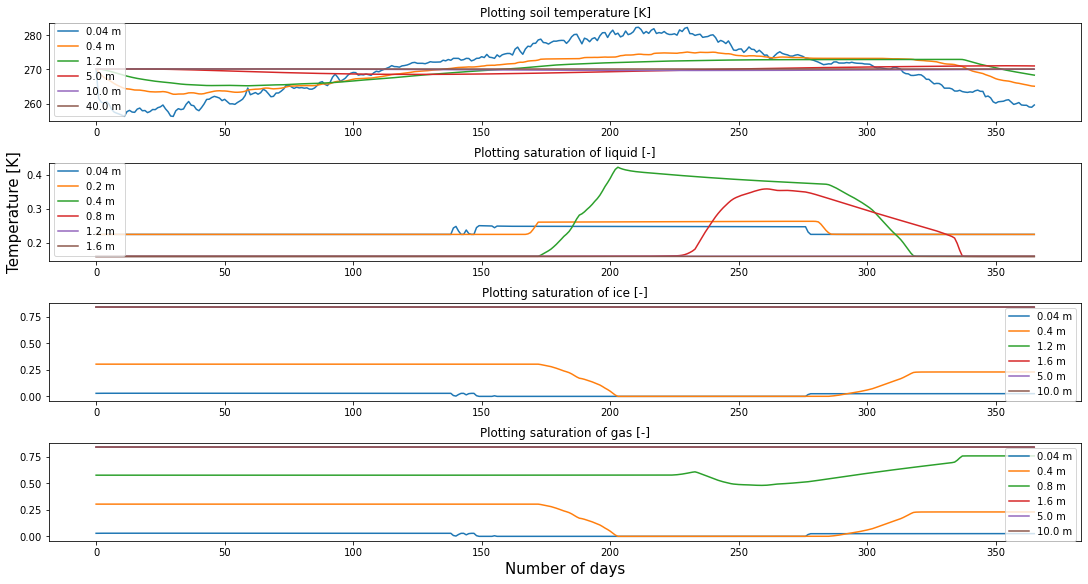

In [145]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
#f2_ax1.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
#f2_ax1.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
f2_ax1.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
#f2_ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
f2_ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
f2_ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
f2_ax2.legend()
f2_ax2.set_ylabel('Temperature [K]',fontsize=15)

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
f2_ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
#f2_ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
f2_ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
#f2_ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')
f2_ax3.legend()

# Plotting saturation of gas
f2_ax4.set_title('Plotting saturation of gas [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(df_observation['point -0.04 saturation gas'],label='0.04 m')
#f2_ax4.plot(df_observation['point -0.2 saturation gas'],label='0.2 m')
f2_ax4.plot(df_observation['point -0.4 saturation gas'],label='0.4 m')
f2_ax4.plot(df_observation['point -0.8 saturation gas'],label='0.8 m')
#f2_ax4.plot(df_observation['point -1.2 saturation gas'],label='1.2 m')
f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
#f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
f2_ax4.plot(df_observation['point -5.0 saturation gas'],label='5.0 m')
f2_ax4.plot(df_observation['point -10.0 saturation gas'],label='10.0 m')
f2_ax4.set_xlabel('Number of days',fontsize=15)
f2_ax4.legend()


In [179]:
# Reading the csv file 
df_observation = pd.read_csv('Case1_B_glm_cyclicavg_trial_IC.demo/observations.dat', skiprows=250, sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -5.0 temperature [K],point -10.0 temperature [K],...,point -0.04 saturation gas,point -0.1 saturation gas,point -0.2 saturation gas,point -0.4 saturation gas,point -0.8 saturation gas,point -1.2 saturation gas,point -1.6 saturation gas,point -5.0 saturation gas,point -10.0 saturation gas,time [days]
time [days],,,,,,,,,,,,,,,,,,,,,
0.0,0.0,268.470785,268.470784,268.470782,268.470780,268.470772,268.470756,268.470737,268.470404,268.469194,...,0.013324,0.014079,0.014920,0.134546,0.173816,0.255761,0.431194,0.84049,0.84049,0.0
1.0,86400.0,261.093701,264.444445,266.782611,267.662228,268.319954,268.451670,268.467998,268.470401,268.469192,...,0.013774,0.014273,0.014988,0.134555,0.173816,0.255761,0.431194,0.84049,0.84049,1.0
2.0,172800.0,260.133190,263.148058,265.692017,266.809153,267.953966,268.352450,268.442208,268.470398,268.469189,...,0.013864,0.014361,0.015042,0.134567,0.173818,0.255760,0.431193,0.84049,0.84049,2.0
3.0,259200.0,259.771719,262.491996,264.973241,266.143101,267.554787,268.200053,268.390691,268.470393,268.469186,...,0.013899,0.014410,0.015083,0.134578,0.173821,0.255759,0.431191,0.84049,0.84049,3.0
4.0,345600.0,260.310885,262.473119,264.627688,265.708829,267.193397,268.020082,268.316402,268.470381,268.469183,...,0.013846,0.014412,0.015103,0.134587,0.173823,0.255758,0.431188,0.84049,0.84049,4.0


In [180]:
len(df_observation)

366

In [181]:
df_observation.columns

Index(['time [s]', 'point -0.04 temperature [K]', 'point -0.1 temperature [K]',
       'point -0.2 temperature [K]', 'point -0.4 temperature [K]',
       'point -0.8 temperature [K]', 'point -1.2 temperature [K]',
       'point -1.6 temperature [K]', 'point -5.0 temperature [K]',
       'point -10.0 temperature [K]', 'point -20.0 temperature [K]',
       'point -30.0 temperature [K]', 'point -40.0 temperature [K]',
       'point -0.04 saturation liquid', 'point -0.1 saturation liquid',
       'point -0.2 saturation liquid', 'point -0.4 saturation liquid',
       'point -0.8 saturation liquid', 'point -1.2 saturation liquid',
       'point -1.6 saturation liquid', 'point -5.0 saturation liquid',
       'point -10.0 saturation liquid', 'point -0.01 saturation ice',
       'point -0.04 saturation ice', 'point -0.1 saturation ice',
       'point -0.2 saturation ice', 'point -0.4 saturation ice',
       'point -0.8 saturation ice', 'point -1.2 saturation ice',
       'point -1.6 saturation 

#### Plotting the values 
##### 1. Subsurface temperature

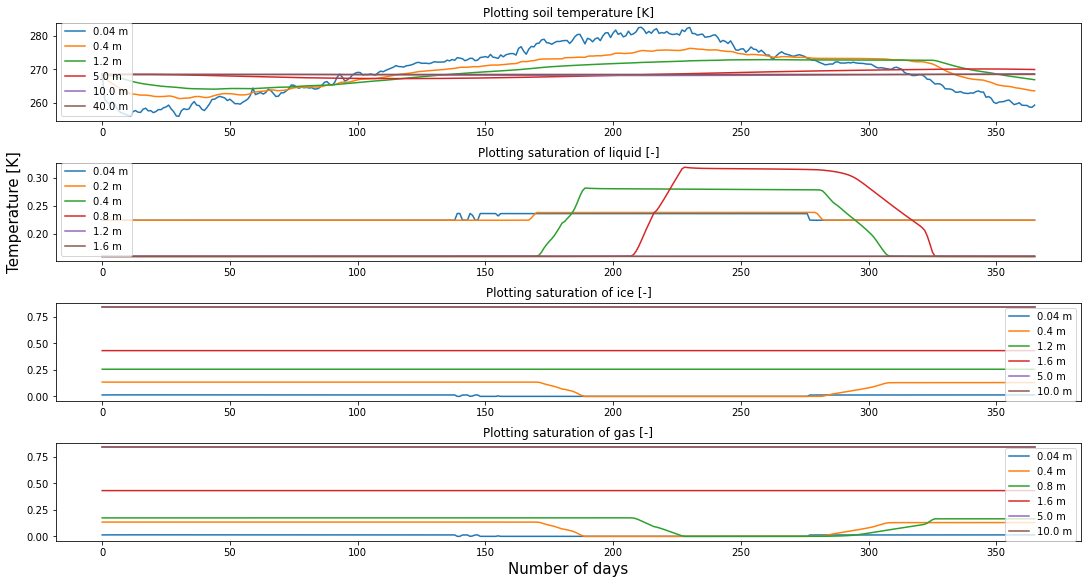

In [182]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
#f2_ax1.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
#f2_ax1.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
f2_ax1.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
#f2_ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
f2_ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
f2_ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
f2_ax2.legend()
f2_ax2.set_ylabel('Temperature [K]',fontsize=15)

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
f2_ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
#f2_ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
f2_ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
#f2_ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')
f2_ax3.legend()

# Plotting saturation of gas
f2_ax4.set_title('Plotting saturation of gas [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(df_observation['point -0.04 saturation gas'],label='0.04 m')
#f2_ax4.plot(df_observation['point -0.2 saturation gas'],label='0.2 m')
f2_ax4.plot(df_observation['point -0.4 saturation gas'],label='0.4 m')
f2_ax4.plot(df_observation['point -0.8 saturation gas'],label='0.8 m')
#f2_ax4.plot(df_observation['point -1.2 saturation gas'],label='1.2 m')
f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
#f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
f2_ax4.plot(df_observation['point -5.0 saturation gas'],label='5.0 m')
f2_ax4.plot(df_observation['point -10.0 saturation gas'],label='10.0 m')
f2_ax4.set_xlabel('Number of days',fontsize=15)
f2_ax4.legend()


In [183]:
# Reading the csv file 
df_observation = pd.read_csv('Case1_B_glm_cyclicavg_trial_BottomBC.demo/observations.dat', skiprows=250, sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -5.0 temperature [K],point -10.0 temperature [K],...,point -0.04 saturation gas,point -0.1 saturation gas,point -0.2 saturation gas,point -0.4 saturation gas,point -0.8 saturation gas,point -1.2 saturation gas,point -1.6 saturation gas,point -5.0 saturation gas,point -10.0 saturation gas,time [days]
time [days],,,,,,,,,,,,,,,,,,,,,
0.0,0.0,268.470785,268.470784,268.470782,268.470780,268.470772,268.470756,268.470737,268.470404,268.469194,...,0.430350,0.436936,0.443901,0.458285,0.494220,0.552106,0.640626,0.838298,0.838299,0.0
1.0,86400.0,260.678842,263.597233,265.838356,267.161872,268.245222,268.444643,268.467090,268.470401,268.469192,...,0.432479,0.438564,0.444985,0.458911,0.494345,0.552121,0.640628,0.838298,0.838299,1.0
2.0,172800.0,259.804456,262.306028,264.495322,266.008449,267.736728,268.310978,268.432186,268.470398,268.469189,...,0.432604,0.438802,0.445332,0.459309,0.494597,0.552195,0.640647,0.838298,0.838299,2.0
3.0,259200.0,259.477094,261.658053,263.675021,265.172016,267.202772,268.107215,268.361971,268.470394,268.469187,...,0.432649,0.438908,0.445508,0.459542,0.494824,0.552301,0.640685,0.838298,0.838299,3.0
4.0,345600.0,260.086019,261.731447,263.378387,264.689328,266.738119,267.868642,268.260332,268.470384,268.469184,...,0.432565,0.438896,0.445566,0.459661,0.494997,0.552417,0.640738,0.838298,0.838299,4.0


#### Plotting the values 
##### 1. Subsurface temperature

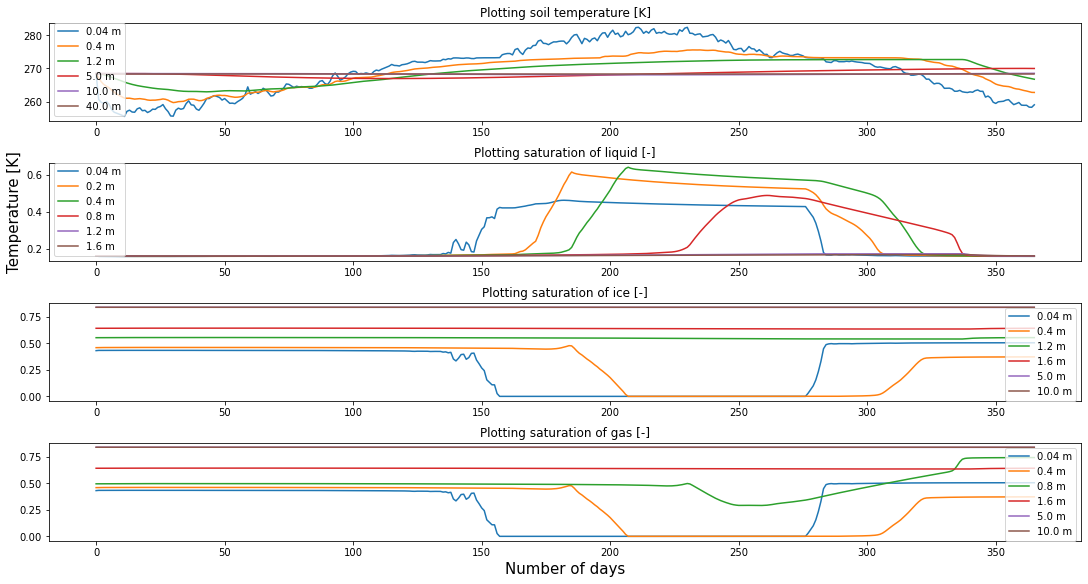

In [184]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
#f2_ax1.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
#f2_ax1.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
f2_ax1.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
#f2_ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
f2_ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
f2_ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
f2_ax2.legend()
f2_ax2.set_ylabel('Temperature [K]',fontsize=15)

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
f2_ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
#f2_ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
f2_ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
#f2_ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')
f2_ax3.legend()

# Plotting saturation of gas
f2_ax4.set_title('Plotting saturation of gas [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(df_observation['point -0.04 saturation gas'],label='0.04 m')
#f2_ax4.plot(df_observation['point -0.2 saturation gas'],label='0.2 m')
f2_ax4.plot(df_observation['point -0.4 saturation gas'],label='0.4 m')
f2_ax4.plot(df_observation['point -0.8 saturation gas'],label='0.8 m')
#f2_ax4.plot(df_observation['point -1.2 saturation gas'],label='1.2 m')
f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
#f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
f2_ax4.plot(df_observation['point -5.0 saturation gas'],label='5.0 m')
f2_ax4.plot(df_observation['point -10.0 saturation gas'],label='10.0 m')
f2_ax4.set_xlabel('Number of days',fontsize=15)
f2_ax4.legend()


In [190]:
df_observation[['point -0.04 saturation gas','point -0.04 saturation liquid','point -0.04 saturation ice']]

,point -0.04 saturation gas,point -0.04 saturation liquid,point -0.04 saturation ice
time [days],,,
0.0,0.430350,0.161702,0.430350
1.0,0.432479,0.159593,0.432479
2.0,0.432604,0.159482,0.432604
3.0,0.432649,0.159442,0.432649
4.0,0.432565,0.159516,0.432565
...,...,...,...
361.0,0.504331,0.159379,0.504331
362.0,0.504330,0.159381,0.504330
363.0,0.504396,0.159321,0.504396


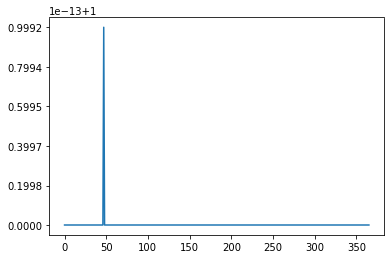

In [196]:
plt.plot(df_observation['point -5.0 saturation liquid'] + df_observation['point -5.0 saturation ice'])

In [102]:
#### Reading the input data - Spinup
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'/home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk/Input_data_Spinup/Spinup_input_cyclic_10yrs.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    #print(np.array(hdf.get('air temperature [K]')))
    #print(len(np.array(hdf.get('air temperature [K]'))))
    soil_temp_0cm = np.array(hdf.get('Soil temperature at - 0.00 m [K]'))

    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))

List of datasets in this file: 
 
 ['Incoming shortwave radiation (W', 'Relative humidity at 5 m (%)', 'Soil temperature at - 0.00 m [K]', 'Wind speed at 10 m (m', 'air temperature [K]', 'precipitation rain [m s^-1]', 'precipitation snow [m SWE s^-1]_sd0.01', 'precipitation snow [m SWE s^-1]_sd0.04', 'precipitation snow [m SWE s^-1]_sd0.1', 'precipitation snow [m SWE s^-1]_sd0.2', 'precipitation snow [m SWE s^-1]_sd0.45', 'time [s]']




In [104]:
len(soil_temp_0cm)

3650

In [106]:
# Reading the csv file 
df_observation = pd.read_csv('Case1_B_glm.demo/observations.dat', skiprows=88, sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,point -0.2 saturation liquid,point -0.4 saturation liquid,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid,time [days]
time [days],,,,,,,,,,,,,,,,
0.0,0.0,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,0.224330,0.224330,0.224330,0.159523,0.159523,0.159523,0.159523,0.0
1.0,86400.0,261.926740,265.768178,268.402010,269.347566,270.019587,270.133541,270.147335,0.224326,0.224326,0.224328,0.159516,0.159522,0.159523,0.159523,1.0
2.0,172800.0,261.355922,264.581452,267.362942,268.539508,269.704270,270.046731,270.121952,0.224325,0.224326,0.224327,0.159511,0.159519,0.159522,0.159523,2.0
3.0,259200.0,261.794704,264.370964,266.861384,268.010090,269.381589,269.916568,270.072084,0.224325,0.224326,0.224327,0.159508,0.159516,0.159521,0.159523,3.0
4.0,345600.0,261.915527,264.257574,266.549982,267.643647,269.091076,269.764063,270.000929,0.224326,0.224326,0.224327,0.159507,0.159514,0.159519,0.159522,4.0


In [107]:
len(df_observation)

366

In [108]:
df_observation.columns

Index(['time [s]', 'point -0.04 temperature [K]', 'point -0.1 temperature [K]',
       'point -0.2 temperature [K]', 'point -0.4 temperature [K]',
       'point -0.8 temperature [K]', 'point -1.2 temperature [K]',
       'point -1.6 temperature [K]', 'point -0.04 saturation liquid',
       'point -0.1 saturation liquid', 'point -0.2 saturation liquid',
       'point -0.4 saturation liquid', 'point -0.8 saturation liquid',
       'point -1.2 saturation liquid', 'point -1.6 saturation liquid',
       'time [days]'],
      dtype='object')

#### Plotting the values 
##### 1. Subsurface temperature

Text(0, 0.5, 'Temperature [K]')

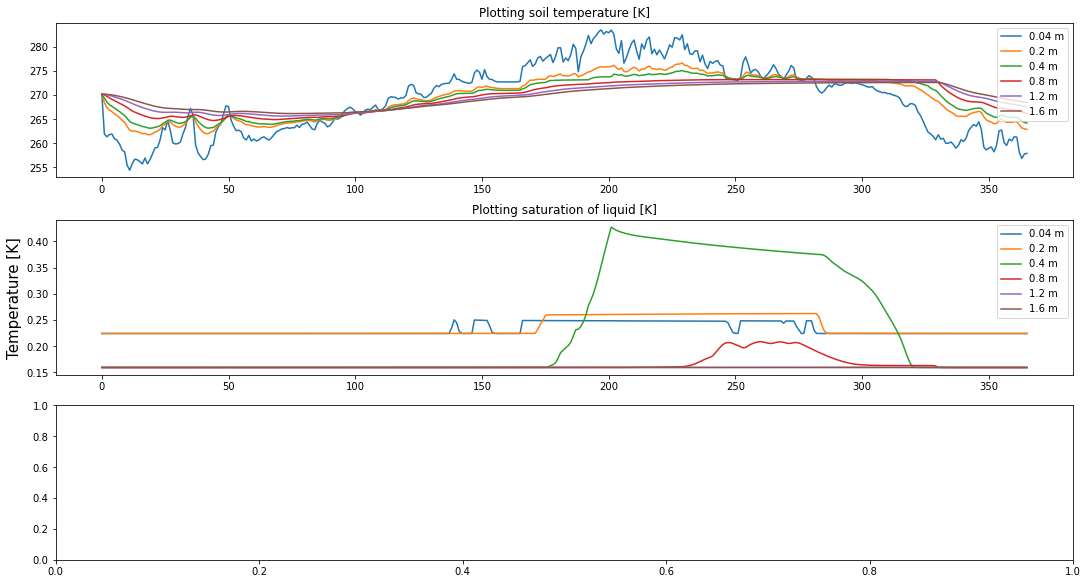

In [109]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
f2_ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
f2_ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
f2_ax2.legend()
f2_ax2.set_ylabel('Temperature [K]',fontsize=15)




In [100]:
#### Reading the input data - Spinup
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'/home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk/Input_data_Spinup/Spinup_input_cyclic_10yrs.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    #print(np.array(hdf.get('air temperature [K]')))
    #print(len(np.array(hdf.get('air temperature [K]'))))
    air_temp = np.array(hdf.get('air temperature [K]'))

    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))

List of datasets in this file: 
 
 ['Incoming shortwave radiation (W', 'Relative humidity at 5 m (%)', 'Soil temperature at - 0.00 m [K]', 'Wind speed at 10 m (m', 'air temperature [K]', 'precipitation rain [m s^-1]', 'precipitation snow [m SWE s^-1]_sd0.01', 'precipitation snow [m SWE s^-1]_sd0.04', 'precipitation snow [m SWE s^-1]_sd0.1', 'precipitation snow [m SWE s^-1]_sd0.2', 'precipitation snow [m SWE s^-1]_sd0.45', 'time [s]']


